##Graph Centrality and MNIST in PyTorch

###Problem 1 - Initializing Karate Club Graph and Plotting Distributions

Text(0.5, 1.0, 'Distribution of Closeness Centrality')

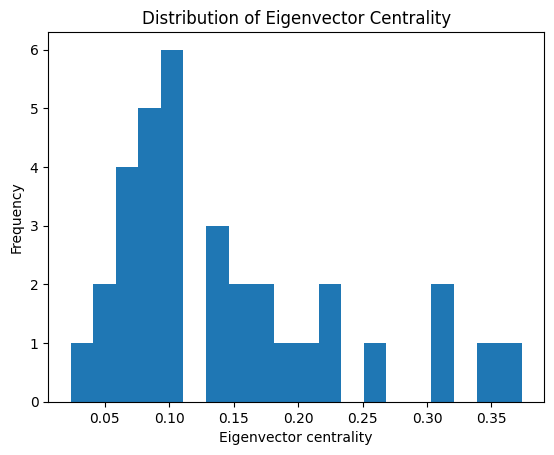

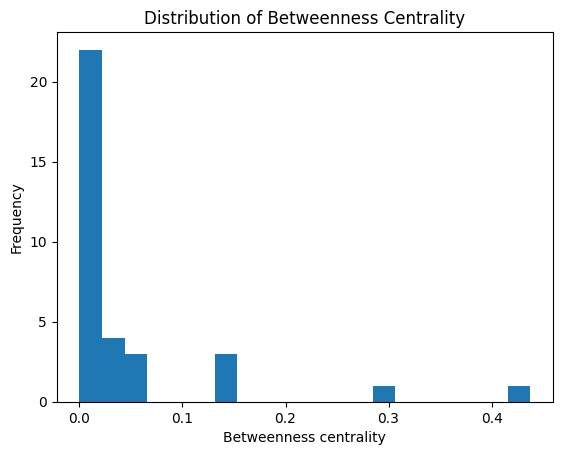

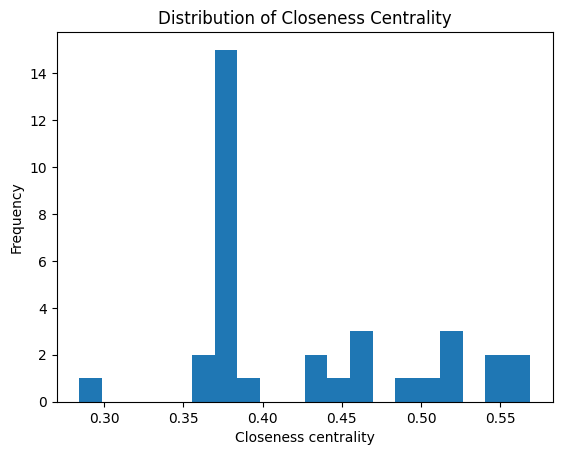

In [ ]:
# 1. Initialize a karate club graph and plot the distribution of 
# the eigenvector centralities, the betweenness centralities, 
# and the closeness centralities for all nodes. Your output should be 
# three histogram plots.
# Hint: there are different centrality functions implemented in nx

import networkx as nx
import matplotlib.pyplot as plt
G = nx.karate_club_graph()

# Eigenvector centrality for the graph G
plt.figure()
centrality = nx.eigenvector_centrality(G)
plt.hist(list(centrality.values()), bins=20)
plt.xlabel('Eigenvector centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Eigenvector Centrality')

# Betweenness centrality for nodes of graph G
plt.figure()
centrality = nx.betweenness_centrality(G)
plt.hist(list(centrality.values()), bins=20)
plt.xlabel('Betweenness centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality')

# Closeness centrality for nodes of graph G
plt.figure()
centrality =  nx.closeness_centrality(G)
plt.hist(list(centrality.values()), bins=20)
plt.xlabel('Closeness centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness Centrality')

###Problem 2 - Plotting Krackhardt Kite Graph

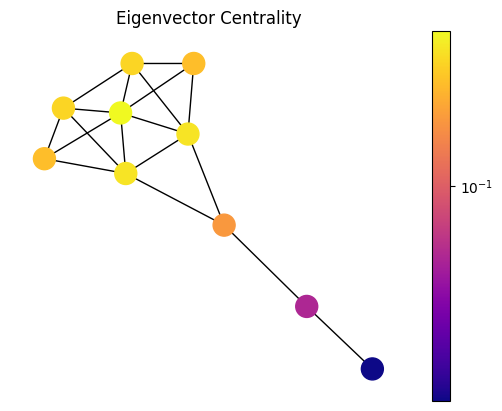

In [ ]:
# 2. Use the "draw" function in Demo 14.1, plot the krackhardt kite graph 
# with eigenvector centrality value as color norm. 
# You can use spring_layout or any other layout for the position.

import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    # Add code to this function
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

# Create krackhardt kite graph 
G = nx.krackhardt_kite_graph()

# Use layout of choice
pos = nx.spring_layout(G, seed=675)
# Draw graph - do not forget to title your graph 
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

###Problem 3 - Plotting Krackhardt Kite Graph with Centralities

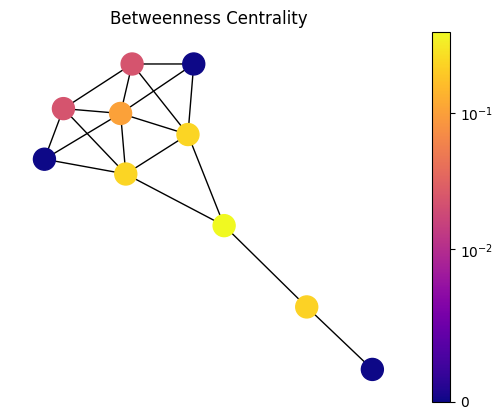

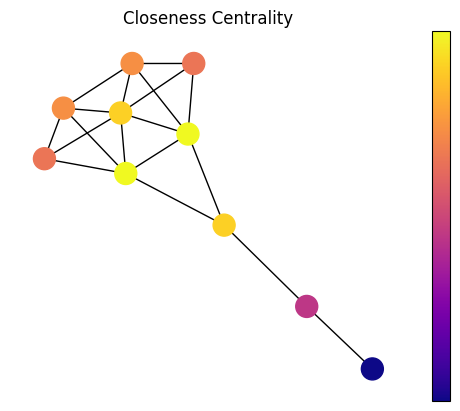

In [ ]:
# 3. Similarly, plot the krackhardt kite graph with betweenness centrality as color
# and closeness centrality as color. You can find the difference of the highest 
# centrality node between these centrality methods.

# Betweenness Centrality
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

# Closeness Centrality
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

###Problem 4 - PyTorch MNIST Classification

In [ ]:
# 4. We have already seen the MNIST classification code in PyTorch in Demo 14.5. 
# Let's go through it again and try to understand each part in PyTorch.

# 1) Load the data
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

# Load the training set (MNIST)
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the test set (MNIST)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders to load the data in batches
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)


In [ ]:
# 2) Define the model
import torch
import torch.nn as nn

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        # Define self.layers here
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Add code here
        x = x.view(x.size(0), -1) # Flatten the input tensor
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x
  
model = MLPClassifier(input_size=28*28, hidden_size=20, num_classes=10)

In [ ]:
# 3) Define the optimizer and some hyperparameters 
# (You can set epoch number to 1 for faster training, we are just trying to understand the code here)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# 4) Train
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to device
        images, labels = images.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))


Epoch [1/10], Step [100/1875], Loss: 1.0636
Epoch [1/10], Step [200/1875], Loss: 1.0408
Epoch [1/10], Step [300/1875], Loss: 0.4040
Epoch [1/10], Step [400/1875], Loss: 0.6699
Epoch [1/10], Step [500/1875], Loss: 0.3051
Epoch [1/10], Step [600/1875], Loss: 0.3489
Epoch [1/10], Step [700/1875], Loss: 0.9590
Epoch [1/10], Step [800/1875], Loss: 0.1961
Epoch [1/10], Step [900/1875], Loss: 0.2144
Epoch [1/10], Step [1000/1875], Loss: 0.1546
Epoch [1/10], Step [1100/1875], Loss: 0.2241
Epoch [1/10], Step [1200/1875], Loss: 0.1263
Epoch [1/10], Step [1300/1875], Loss: 0.3937
Epoch [1/10], Step [1400/1875], Loss: 0.1091
Epoch [1/10], Step [1500/1875], Loss: 0.2595
Epoch [1/10], Step [1600/1875], Loss: 0.1130
Epoch [1/10], Step [1700/1875], Loss: 0.0476
Epoch [1/10], Step [1800/1875], Loss: 0.4859
Epoch [2/10], Step [100/1875], Loss: 0.1611
Epoch [2/10], Step [200/1875], Loss: 0.2851
Epoch [2/10], Step [300/1875], Loss: 0.1608
Epoch [2/10], Step [400/1875], Loss: 0.0741
Epoch [2/10], Step [500

In [ ]:
# 5） Test
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        # Move images and labels to device
        images, labels = images.to(device), labels.to(device)

        # Predict the classes of the images
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Update statistics
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the {} test images: {:.2f}%'
      .format(len(test_set), 100 * correct / total))

Accuracy of the network on the 10000 test images: 94.16%
